# Insurance Premium Prediction

### Problem Statement:

#### Attribute Information

In [1]:
# import neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [2]:
# import dataset
df = pd.read_csv('insurance.csv')

## EDA

In [3]:
# check no .of rows and columns of the dataset
df.shape

(1338, 7)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
# check datatypes of features.
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [6]:
# datatypes are correct.

In [7]:
# define numeric and categorical columns
num_col = [col for col in df.columns if df[col].dtypes != 'O']
cat_col = [col for col in df.columns if df[col].dtypes == 'O']

In [8]:
num_col

['age', 'bmi', 'children', 'expenses']

In [9]:
cat_col

['sex', 'smoker', 'region']

In [10]:
# checking numerical features for continuous or discrete variable

In [11]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

<AxesSubplot:>

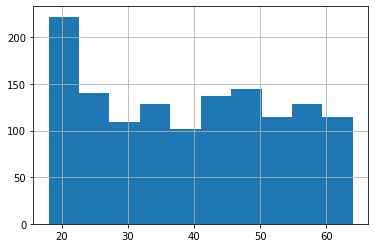

In [12]:
df['age'].hist()

In [13]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

<AxesSubplot:>

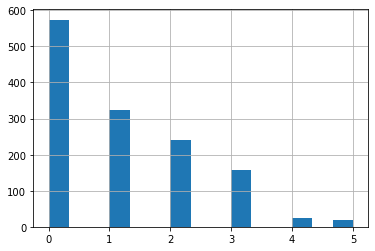

In [14]:
df['children'].hist(bins=15)

In [15]:
df['expenses'].unique()[0:20]

array([16884.92,  1725.55,  4449.46, 21984.47,  3866.86,  3756.62,
        8240.59,  7281.51,  6406.41, 28923.14,  2721.32, 27808.73,
        1826.84, 11090.72, 39611.76,  1837.24, 10797.34,  2395.17,
       10602.39, 36837.47])

<AxesSubplot:>

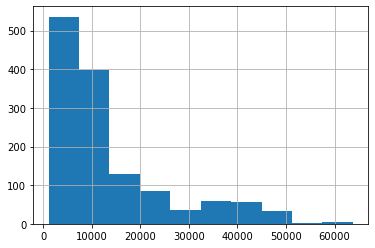

In [16]:
df['expenses'].hist()

In [17]:
df['bmi'].unique()[0:20]

array([27.9, 33.8, 33. , 22.7, 28.9, 25.7, 33.4, 27.7, 29.8, 25.8, 26.2,
       26.3, 34.4, 39.8, 42.1, 24.6, 30.8, 23.8, 40.3, 35.3])

<AxesSubplot:>

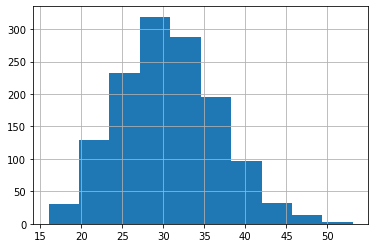

In [18]:
df['bmi'].hist()

In [19]:
# Numerical columns:'age', 'bmi', 'expenses' : continuous variable
#                   'children': discrete variable
# Categorical columns: 'sex', 'smoker', 'region'

In [20]:
# checking cardinality of categorical features
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

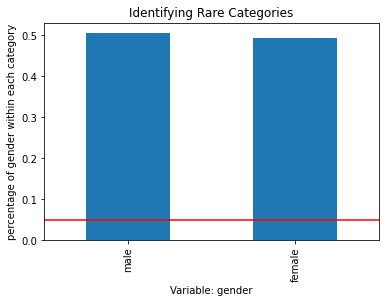

In [21]:
label_freq = df['sex'].value_counts() / len(df)
fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05, color='red')
fig.set_ylabel('percentage of gender within each category')
fig.set_xlabel('Variable: gender')
fig.set_title('Identifying Rare Categories')
plt.show()

In [22]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [23]:
label_freq = df['smoker'].value_counts() / len(df)
print(label_freq)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64


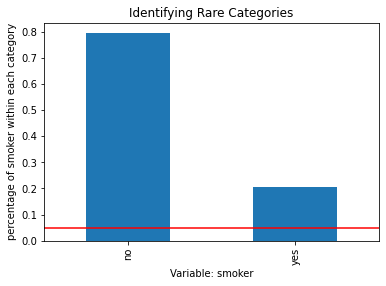

In [24]:
label_freq = df['smoker'].value_counts() / len(df)
fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05, color='red')
fig.set_ylabel('percentage of smoker within each category')
fig.set_xlabel('Variable: smoker')
fig.set_title('Identifying Rare Categories')
plt.show()

In [25]:
# imbalanced feature smoker

In [26]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

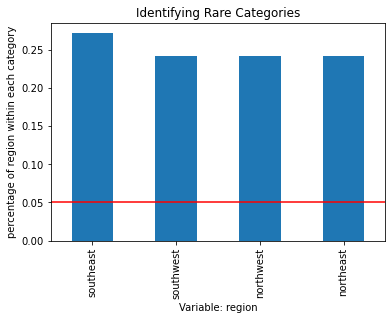

In [27]:
label_freq = df['region'].value_counts() / len(df)
fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05, color='red')
fig.set_ylabel('percentage of region within each category')
fig.set_xlabel('Variable: region')
fig.set_title('Identifying Rare Categories')
plt.show()

In [28]:
df[cat_col].nunique()

sex       2
smoker    2
region    4
dtype: int64

Text(0.5, 1.0, 'Cardinality')

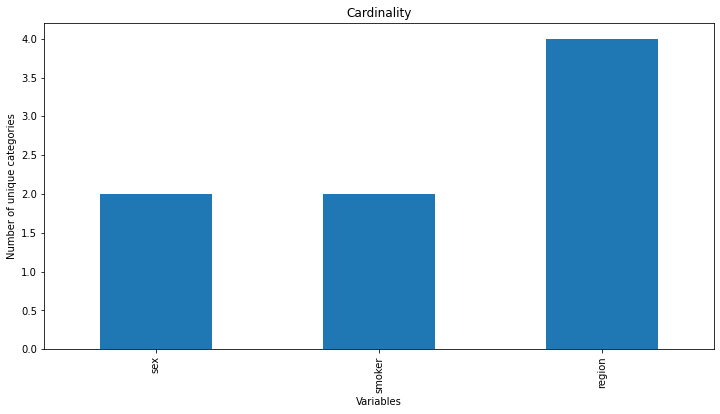

In [29]:
df[cat_col].nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [30]:
#converting list to dataframe
data_num = df[num_col]
data_num.head(2)

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55


In [31]:
data_cat = df[cat_col]
data_cat.head(2)

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast


In [32]:
# checking for null values/missing values.
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [33]:
# checking linear realtionship between target and independent variable.

In [34]:
# checking for duplicates rows
df.duplicated().sum()

1

In [35]:
#removing duplicate row.
df.drop_duplicates(inplace = True)

In [36]:
df.duplicated().sum()

0

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.00,27.00,39.00,51.00,64.00
bmi,1337.0,30.665520,6.100664,16.00,26.30,30.40,34.70,53.10
children,1337.0,1.095737,1.205571,0.00,0.00,1.00,2.00,5.00
expenses,1337.0,13279.121638,12110.359657,1121.87,4746.34,9386.16,16657.72,63770.43


In [38]:
#checking distribution of dataset
#Normality Test

In [39]:
import scipy
from scipy.stats import normaltest
from scipy.stats import stats

In [40]:
normaltest(data_num['age'])[1]*100

0.0

C:\Users\anike\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

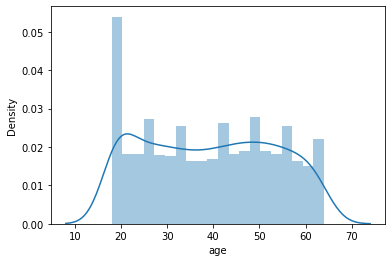

In [41]:
sns.distplot(data_num['age'],bins =20)

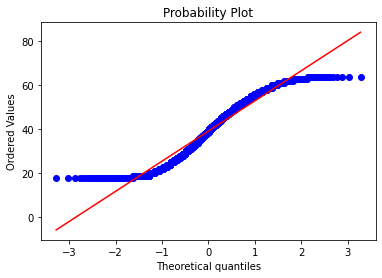

In [42]:
# Q-Q plot
scipy.stats.probplot(df['age'], dist="norm", plot=plt)
plt.show()

In [43]:
normaltest(data_num['bmi'])[1]*100

0.014625501608173452

In [44]:
normaltest(data_num['children'])[1]*100

8.457892706503516e-31

In [45]:
normaltest(data_num['expenses'])[1]*100

7.019803158360419e-72

In [46]:
# column 'age','children','expenses' are not normally distributed. 'bmi' is right skewed

In [47]:
df['bmi'].skew()

0.28446275054239506

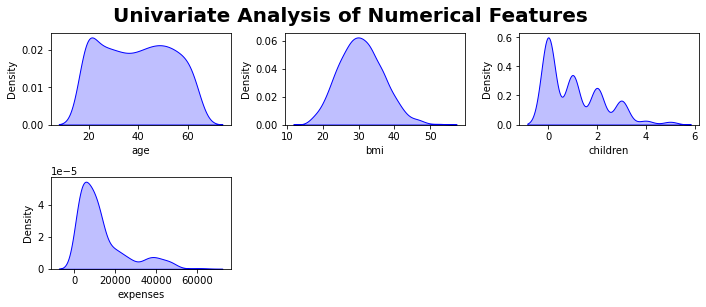

In [48]:
plt.figure(figsize=(10,10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_col[i]],shade=True, color='b')
    plt.xlabel(num_col[i])
    plt.tight_layout()

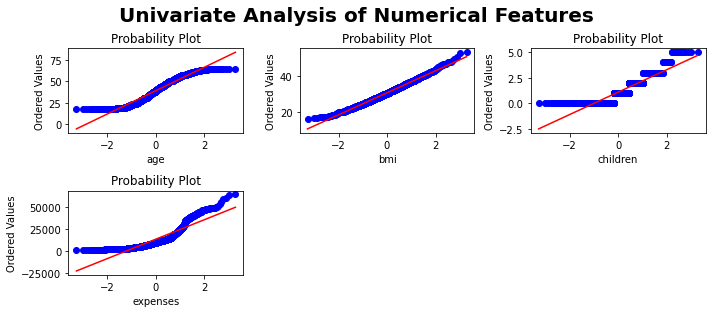

In [49]:
plt.figure(figsize=(10,10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    scipy.stats.probplot(x=df[num_col[i]], dist="norm", plot=plt)
    plt.xlabel(num_col[i])
    plt.tight_layout()

In [50]:
# 'age','children','expenses' feature are not normally distributed.

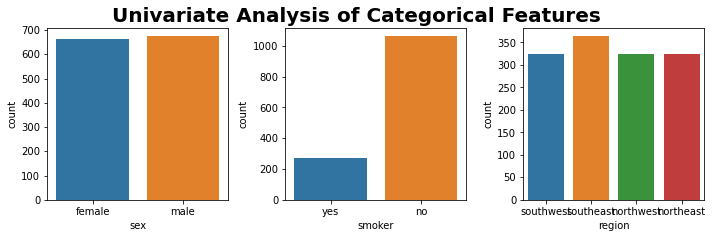

In [51]:
plt.figure(figsize=(10,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(cat_col)):
    plt.subplot(5, 3, i+1)
    sns.countplot(x=df[cat_col[i]],data = df)
    plt.xlabel(cat_col[i])
    plt.tight_layout()

In [52]:
#smoker feature is imbalanced

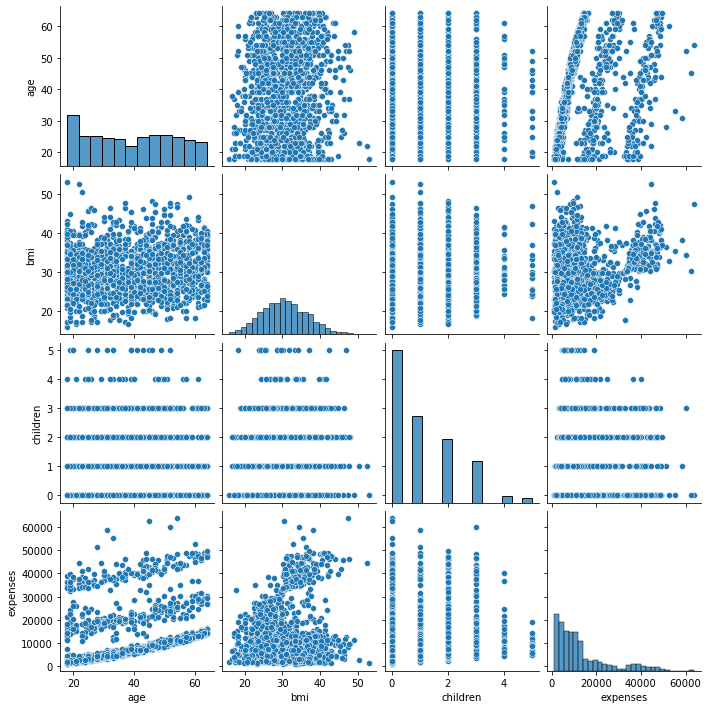

In [53]:
sns.pairplot(data = df)

In [54]:
# no linear relationship between target columns and input columns

<AxesSubplot:xlabel='sex', ylabel='expenses'>

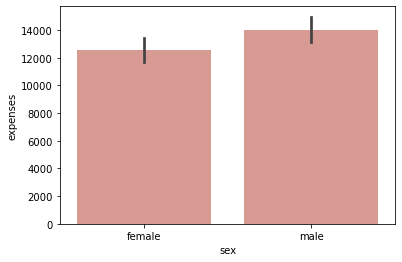

In [55]:
sns.barplot(x="sex", y="expenses", data=df,
                     color="salmon", saturation=.5)

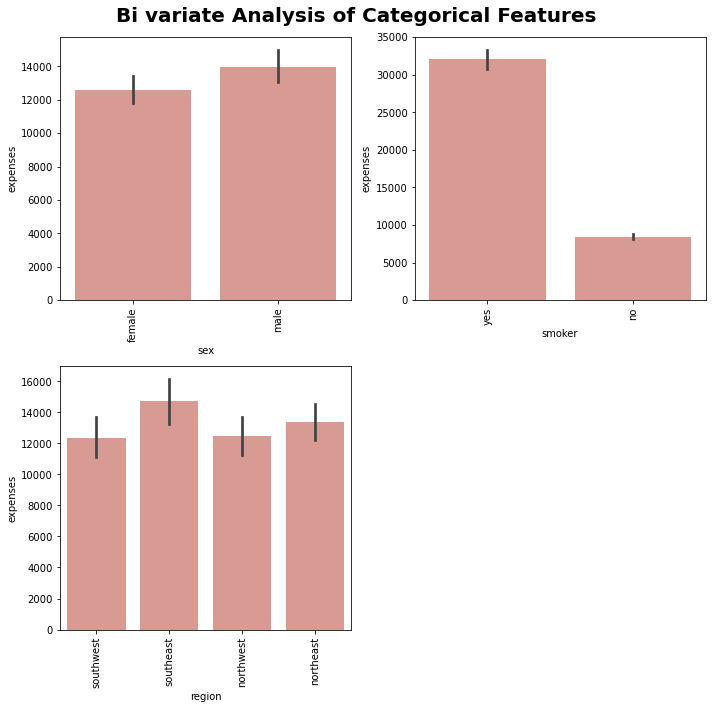

In [56]:
plt.figure(figsize=(10,10))
plt.suptitle('Bi variate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(cat_col)):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=df[cat_col[i]], y="expenses", data=df,
                     color="salmon", saturation=.5)
    plt.xlabel(cat_col[i])
    plt.xticks(rotation = 90)

    plt.tight_layout()

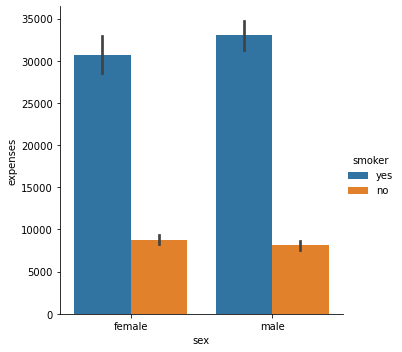

In [57]:
sns.catplot(x="sex", y="expenses",
                   hue="smoker",
                    data=df, kind="bar")

In [58]:
#those people are smokers have high % of health insurance

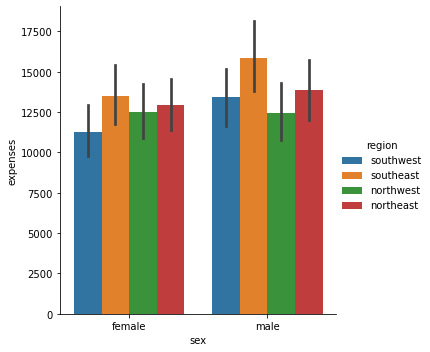

In [59]:

sns.catplot(x="sex", y="expenses",
                   hue="region",
                    data=df, kind="bar")

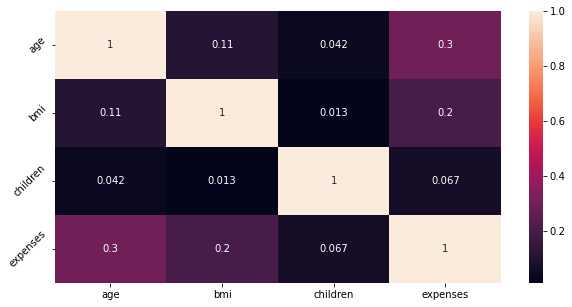

In [60]:
# In numerical column
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot=True)
plt.yticks(rotation=45)
plt.show()

In [61]:
# no multicollinearity

## Outlier handling

#### 1. Box Plot

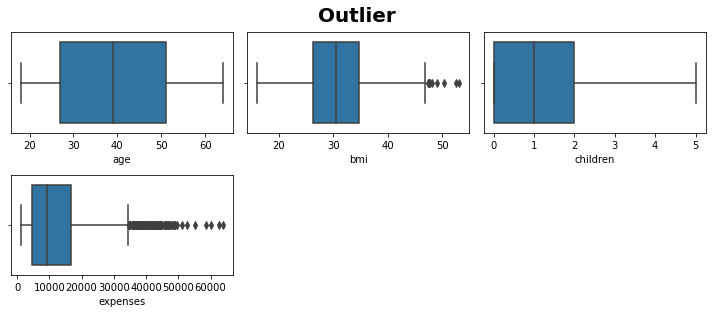

In [62]:
plt.figure(figsize=(10,10))
plt.suptitle('Outlier', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

In [63]:
#outlier are present in 'bmi' and 'expenses' feature

#### 2.Z score method

#since data is not normally distributed z score method not used.

#### 3.Inter Qauntile Method

In [64]:
def handling_outliers(data,column):
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    lower_fence = data[column].quantile(0.25) - (1.5 * IQR)
    higher_fence = data[column].quantile(0.75) + (1.5 * IQR)
    print(column, "---", "IQR --->",IQR)
    print("Lower Fence:",lower_fence)
    print("Higher Fence:", higher_fence)
    print("______________________________________________")
    data.loc[data[column] <=lower_fence, column] = lower_fence
    data.loc[data[column] >=higher_fence, column] = higher_fence


In [65]:
for columns in data_num:
    handling_outliers(data_num,columns)

age --- IQR ---> 24.0
Lower Fence: -9.0
Higher Fence: 87.0
______________________________________________
bmi --- IQR ---> 8.400000000000002
Lower Fence: 13.699999999999998
Higher Fence: 47.300000000000004
______________________________________________
children --- IQR ---> 2.0
Lower Fence: -3.0
Higher Fence: 5.0
______________________________________________
expenses --- IQR ---> 11899.6275
Lower Fence: -13109.15375
Higher Fence: 34489.35625
______________________________________________


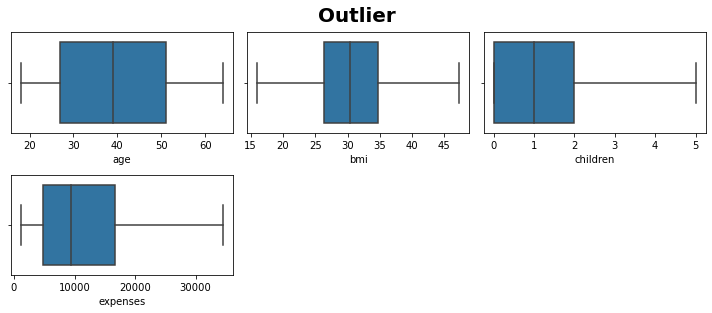

In [66]:
plt.figure(figsize=(10,10))
plt.suptitle('Outlier', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=data_num[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

In [67]:
data_cat.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [68]:
df_new = pd.concat([data_num,data_cat],axis= 1)

In [69]:
df_new.head(1)

,age,bmi,children,expenses,sex,smoker,region
0,19,27.9,0,16884.92,female,yes,southwest


In [72]:
# encoding categorical columns
df_new = pd.get_dummies(df_new,columns=['sex','smoker','region'])

In [74]:
# Saving dataset to file 'cleaned_dataset'
df_new.to_csv('preprocessed_dataset.csv')

In [73]:
df_new.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0


In [85]:
X=df_new.drop(['expenses'],axis=1)
y=df_new['expenses']

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [87]:
X_train.shape

(896, 11)

In [88]:
y_train.shape

(896,)

In [89]:
X_test.shape

(442, 11)

In [90]:
y_test.shape

(442,)

In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [92]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

### Linear Regression

In [93]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.7277529004809274
RMSE 5005.995362860306


In [94]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=i)
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [95]:
scores[np.argmax(scores)]

0.8115810640902055

### Ridge Regression

In [101]:
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.7577589079446363
RMSE 5024.481745923405


In [102]:
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)

scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=i)
    ridge.fit(X_train,y_train)
    y_pred=ridge.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [103]:
scores[np.argmax(scores)]

0.8112344361163477

### Lasso Regression

In [106]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.7580086807414963
RMSE 5021.89072696316


In [108]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=i)
    lasso.fit(X_train,y_train)
    y_pred=lasso.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.817e+08, tolerance: 8.932e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.817e+08, tolerance: 8.932e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.800e+08, toleranc

C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.870e+08, tolerance: 9.089e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.446e+08, tolerance: 9.267e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.948e+08, toleranc

C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.527e+08, tolerance: 9.442e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.684e+08, tolerance: 9.206e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.425e+08, toleranc

C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.161e+08, tolerance: 9.267e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.258e+08, tolerance: 8.987e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.362e+08, toleranc

C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.662e+08, tolerance: 9.389e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.925e+08, tolerance: 8.882e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.994e+08, toleranc

C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.185e+08, tolerance: 9.622e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.406e+08, tolerance: 9.109e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.250e+08, toleranc

C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.876e+08, tolerance: 9.503e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.051e+08, tolerance: 9.429e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.664e+08, toleranc

C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.575e+08, tolerance: 8.703e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.549e+08, tolerance: 9.379e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.972e+08, toleranc

C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.305e+08, tolerance: 9.106e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.991e+08, tolerance: 9.331e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.190e+08, toleranc

C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.611e+08, tolerance: 8.965e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.985e+08, tolerance: 9.047e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.434e+08, toleranc

C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.644e+08, tolerance: 9.121e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.268e+08, tolerance: 9.414e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.601e+08, toleranc

C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.991e+08, tolerance: 9.254e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.311e+08, tolerance: 9.480e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.601e+08, toleranc

In [109]:
scores[np.argmax(scores)]

0.8115810162823728

### K Nearest Neighbour

In [117]:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.22619838959109906
RMSE 8980.120814973186


### Decision Tree Regressor

In [127]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.6469956113883168
RMSE 6065.371653273237


In [130]:
# hyperparameter tuning
grid_param_dt = { "criterion" : ["squared_error", "friedman_mse", "absolute_error","poisson"],
                  "random_state":[1,5,10],
                  "max_depth":[2,5,10]
                }

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
grid_search_dt=GridSearchCV(estimator=dt,param_grid=grid_param_dt,cv=5)
grid_search_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 5, 10], 'random_state': [1, 5, 10]})

In [133]:
grid_search_dt.best_params_

{'criterion': 'absolute_error', 'max_depth': 5, 'random_state': 5}

In [137]:
model_with_best_params = DecisionTreeRegressor(criterion= 'absolute_error', 
                                               max_depth = 5, 
                                               random_state = 5)
model_with_best_params.fit(X_train,y_train)
y_pred = model_with_best_params.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.8275735651520794
RMSE 4239.057321626499


### Random Forest Regressor

In [140]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.8075786456139289
RMSE 4478.102175315831


In [142]:
# hyperparameter tuning
grid_param_rf = {
                    "n_estimators":[20,40,75,100],
                    "random_state":[1,5,10],
                    "max_samples":[0.1,0.2,0.5,1],
                    "max_features":[0.25,0.50,0.75,1],
                    "max_depth":[5,10,15]
                }

In [143]:
grid_search_rf=GridSearchCV(estimator=rf,param_grid=grid_param_rf,cv=5)
grid_search_rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': [0.25, 0.5, 0.75, 1],
                         'max_samples': [0.1, 0.2, 0.5, 1],
                         'n_estimators': [20, 40, 75, 100],
                         'random_state': [1, 5, 10]})

In [145]:
grid_search_rf.best_params_

{'max_depth': 5,
 'max_features': 0.75,
 'max_samples': 0.5,
 'n_estimators': 40,
 'random_state': 1}

In [151]:
model_rf = RandomForestRegressor(   n_estimators = 40,
                                    random_state = 1,
                                    max_samples = 0.5,
                                    max_features = 0.75,
                                    max_depth = 5
                                )
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.8375332245737367
RMSE 4114.808661622777


### Extra Tree Regressor

In [153]:
xt = ExtraTreesRegressor()
xt.fit(X_train,y_train)
y_pred = xt.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.7833164160625404
RMSE 4752.043089773012


In [157]:
# hyperparameter tuning
grid_param_xt = {
                  "n_estimators":[25,50,75,100],
                  "random_state":[1,5,10],
                  "max_features":[0.25,0.5,0.75,1],
                  "max_depth":[5,10,15]
                }

In [158]:
grid_search_xt=GridSearchCV(estimator=xt,param_grid=grid_param_xt,cv=5)
grid_search_xt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': [0.25, 0.5, 0.75, 1],
                         'n_estimators': [25, 50, 75, 100],
                         'random_state': [1, 5, 10]})

In [159]:
grid_search_xt.best_params_

{'max_depth': 5, 'max_features': 0.75, 'n_estimators': 100, 'random_state': 5}

In [160]:
model_xt = ExtraTreesRegressor( max_depth = 5, 
                                max_features = 0.75, 
                                n_estimators = 100, 
                                random_state = 5)
model_xt.fit(X_train,y_train)
y_pred = model_xt.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.8209363169690427
RMSE 4319.874414586626


### AdaBoostRegressor

In [161]:
ab = AdaBoostRegressor()
ab.fit(X_train,y_train)
y_pred = ab.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7927015900093048
MAE 3370.9503184751834


In [164]:
# hyperparameter tuning
grid_param_ab = {
                  "n_estimators":[20,50,100],
                  "learning_rate":[0.01,0.05,0.1],
                   "random_state" :[1,5,10]
                }

In [165]:
grid_search_ab=GridSearchCV(estimator=ab,param_grid=grid_param_ab,cv=5)
grid_search_ab.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [20, 50, 100],
                         'random_state': [1, 5, 10]})

In [166]:
grid_search_ab.best_params_

{'learning_rate': 0.01, 'n_estimators': 50, 'random_state': 1}

In [167]:
model_ab = AdaBoostRegressor(  learning_rate = 0.01, 
                                n_estimators=50,
                                random_state=1)
model_ab.fit(X_train,y_train)
y_pred = model_ab.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.8330371025594265
RMSE 4171.356917039165


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=50,learning_rate=0.01)

pipe_ab_ = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    pipe_ab_.fit(X_train,y_train)
    y_pred=pipe_ab_.predict(X_test)
    scores.append(r2_score(y_test,y_pred))
    
scores[np.argmax(scores)]

In [ ]:
scores[np.argmax(scores)]

### GradientBoostRegressor

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=50)

pipe_gb = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_gb.fit(X_train,y_train)

y_pred = pipe_gb.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

### XgBoostRegressor

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=2,max_depth=4,learning_rate=1)

pipe_xgb = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_xgb.fit(X_train,y_train)

y_pred = pipe_xgb.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=2,max_depth=4,learning_rate=1)

pipe_xgb_ = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    pipe_xgb_.fit(X_train,y_train)
    y_pred=pipe_xgb_.predict(X_test)
    scores.append(r2_score(y_test,y_pred))
    
scores[np.argmax(scores)]

### VotingRegressor

In [ ]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe_vr = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_vr.fit(X_train,y_train)

y_pred = pipe_vr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

### StackingRegressor

In [ ]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe_sr = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_sr.fit(X_train,y_train)

y_pred = pipe_sr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(pipe_ab,open('pipe.pkl','wb'))